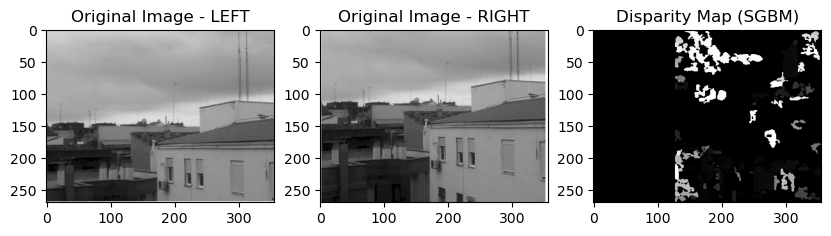

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

left_img = cv2.imread('disparity-1.png', cv2.IMREAD_GRAYSCALE)
right_img = cv2.imread('disparity-2.png', cv2.IMREAD_GRAYSCALE)
left_img_resized = cv2.resize(left_img, (right_img.shape[1], right_img.shape[0]))

stereo_bm = cv2.StereoBM_create(numDisparities=96, blockSize=15)


disparity_bm = stereo_bm.compute(left_img_resized, right_img)


disparity_bm_normalized = cv2.normalize(disparity_bm, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)
disparity_bm_normalized = np.uint8(disparity_bm_normalized)


min_disp = 0
num_disp = 128 - min_disp  
stereo_sgbm = cv2.StereoSGBM_create(
    minDisparity=min_disp,
    numDisparities=num_disp,
    blockSize=9,
    P1=8 * 3 * 3 ** 2,
    P2=32 * 3 * 3 ** 2,
    disp12MaxDiff=1,
    uniquenessRatio=10,
    speckleWindowSize=100,
    speckleRange=32,
    preFilterCap=63
)


disparity_sgbm = stereo_sgbm.compute(left_img_resized, right_img)


disparity_sgbm_normalized = cv2.normalize(disparity_sgbm, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)
disparity_sgbm_normalized = np.uint8(disparity_sgbm_normalized)


plt.figure(figsize=(10,5))

plt.subplot(1, 3, 1)
plt.imshow(left_img_resized, cmap='gray')
plt.title('Original Image - LEFT')

plt.subplot(1, 3, 2)
plt.imshow(right_img, cmap='gray')
plt.title('Original Image - RIGHT')

plt.subplot(1, 3, 3)
plt.imshow(disparity_sgbm_normalized, cmap='gray')
plt.title('Disparity Map (SGBM)')

plt.show()


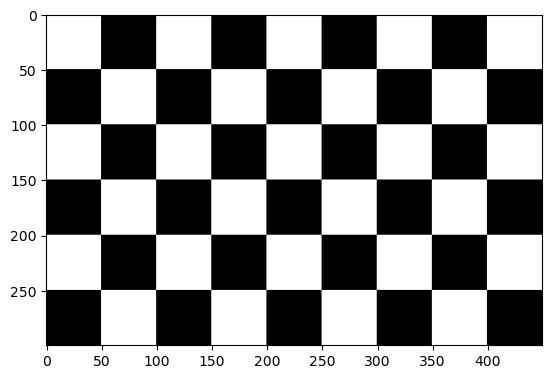

In [13]:
import cv2
import matplotlib.pyplot as plt
img = cv2.imread('chessboard_input_image.png')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(gray,cmap='gray')

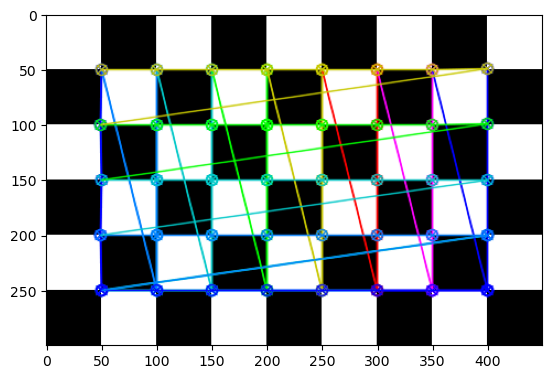

In [23]:
ret, corners = cv2.findChessboardCorners(gray, (8,5),None)
if ret == True:
    img = cv2.drawChessboardCorners(img, (8,5), corners,ret)
    plt.imshow(img)
    

In [27]:
circular_grid_image_path = 'circular_grid_image.png' 
circular_grid_img = cv2.imread(circular_grid_image_path)
gray_circular_grid = cv2.cvtColor(circular_grid_img, cv2.COLOR_BGR2GRAY)

grid_width = 8  
grid_height = 6  

ret_circular_grid, centers_circular_grid = cv2.findCirclesGrid(gray_circular_grid, (grid_width, grid_height), cv2.CALIB_CB_SYMMETRIC_GRID)

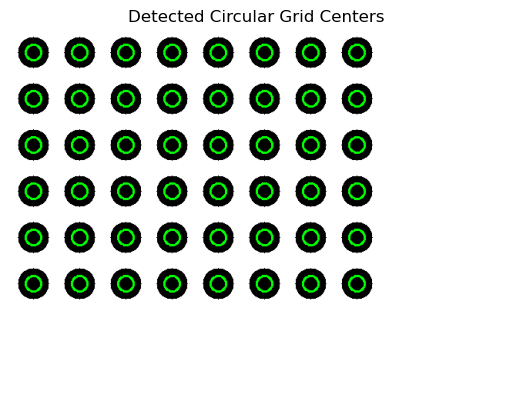

In [28]:
if ret_circular_grid:
    for center in centers_circular_grid:
        x, y = center[0]
        cv2.circle(circular_grid_img, (int(x), int(y)), 10, (0, 255, 0), 2)  # Green circle with radius 10
    circular_grid_img_rgb = cv2.cvtColor(circular_grid_img, cv2.COLOR_BGR2RGB)
    plt.imshow(circular_grid_img_rgb)
    plt.title('Detected Circular Grid Centers')
    plt.axis('off')
    plt.show()
else:
    print("Circular grid centers not found.")